In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Introduction
The Data for this study includes every homicide within the city limits of Chicago from 2001-2017.  What I want to achieve with the analysis of this data is to find correlation and causation for these crimes. 

Each row of data in the dataset represents one homicide, there are no duplicates and null values have been discarded.

I will compare:
Time of day and geography
Time of year and geograpy
Time of day and time of year
Time of day, time of year, and geography

The data has been cleaned in the following ways:

I converted the 'Date' field from mm/dd/yy to 'Date1', an integer that only represents each month (1-12).
I converted the 'Time' field from hh:mm:ss to 'Time1', an integer that only represents each hour (1-24).

The first plot are all features compared to each other, there seems to be a lot of commonality with the District, Beat, and Ward geographic features, my guess is because all of these features overlap each other.

I plotted histograms of each feature to look for commonality in the data, again the distrobution for Beat, District, and Ward are similar.

I started combining features that had the highest R values

Then I combined The combination features I had created with each other.

I did the scaling because all of my variables had different ranges, but I'm not exactly sure if I understand what this was for, I didn't see any changes to the graphs.

Then I did PCA against features that had the lowest R values.  But other than determining which feature had the highest variance, I'm not sure what I was doing here.


Some of feature engineering I did really doesn't make sence to me, I have a lot of questions about this.




No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


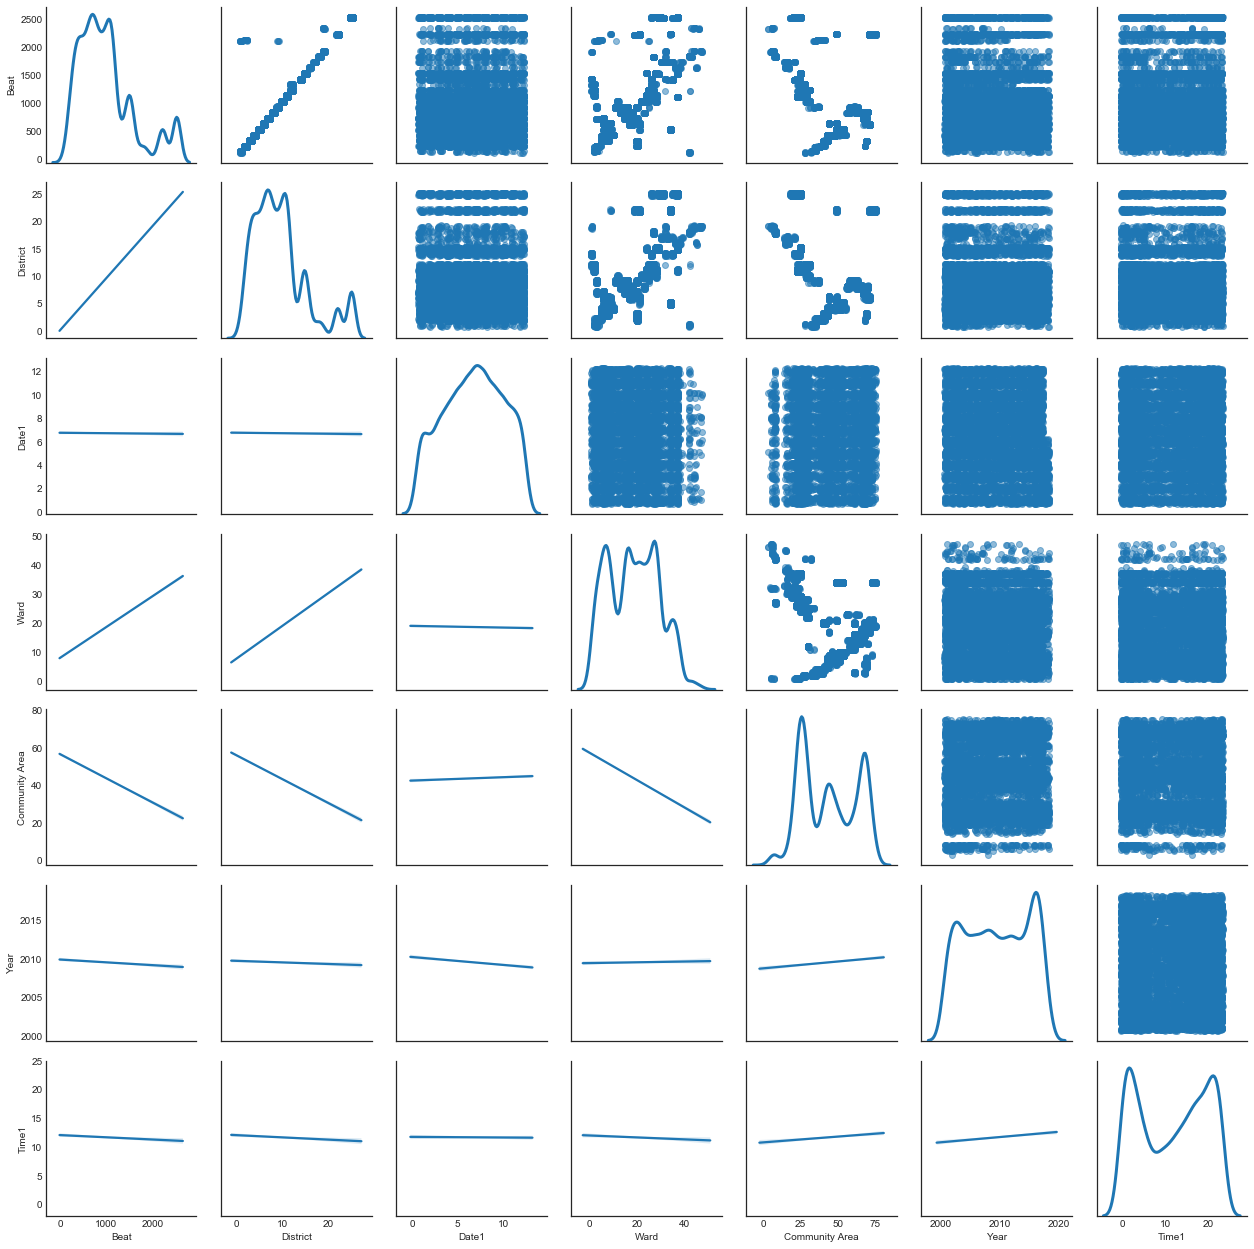

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")
featurelist = ['Date', 'Beat', 'District', 'Date1', 'Time',
                'Ward', 'Community Area', 'Year', 'Time1']
data1 = pd.read_csv('chicagohomicideunit2.csv')
data1['Date1'] = data1['Date'].astype(str).str[:2].astype(int)
data1['Time1'] = data1['Time'].astype(str).str[:2].astype(int)
data1.head
# Take a subset of the data to make plots clearer.
data1sub = data1[['Beat', 'District', 'Date1',
                'Ward', 'Community Area', 'Year', 'Time1']].dropna()
# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
data1sub_jittered = data1sub[['Beat', 'District', 'Date1', 'Ward', 'Community Area', 'Year', 'Time1']].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(data1sub_jittered.shape)),
    columns=data1sub_jittered.columns
)
# Combine the data and the noise.
df_jittered = data1sub_jittered.add(jitter)
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
#g = sns.PairGrid(data1sub.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

In [3]:
data1sub.head(5)

,Beat,District,Date1,Ward,Community Area,Year,Time1
52,1823,18,2,27.0,8.0,2006,11
53,533,5,12,9.0,54.0,2016,12
54,533,5,8,9.0,54.0,2005,11
55,533,5,12,9.0,54.0,2003,1
57,533,5,5,9.0,54.0,2011,23


In [4]:
#I wanted to look at the histograms for each featuer to see what the data looked like.

    

C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


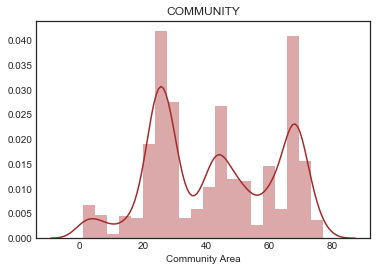

In [5]:
sns.distplot( data1sub["Community Area"] , color="brown", bins=20)
plt.title('COMMUNITY')
plt.show()


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


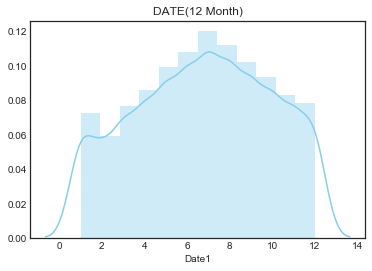

In [6]:
sns.distplot( data1sub["Date1"] , color="skyblue", bins=12)
plt.title('DATE(12 Month)')
plt.show()


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

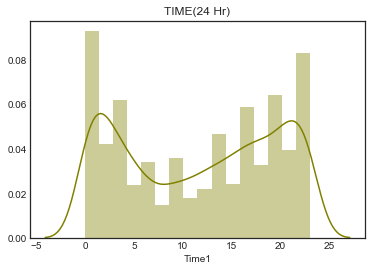

In [7]:
sns.distplot( data1sub["Time1"] , color="olive")
plt.title('TIME(24 Hr)')
plt.show


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

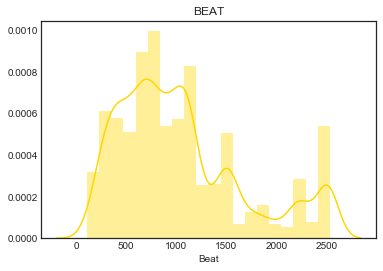

In [8]:
sns.distplot( data1sub["Beat"] , color="gold", bins=20)
plt.title('BEAT')
plt.show


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

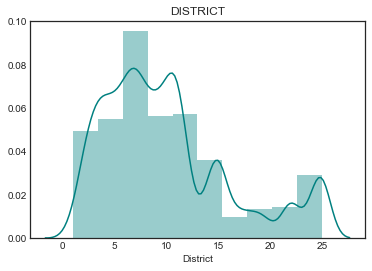

In [9]:
sns.distplot( data1sub["District"] , color="teal", bins=10)
plt.title('DISTRICT')
plt.show


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


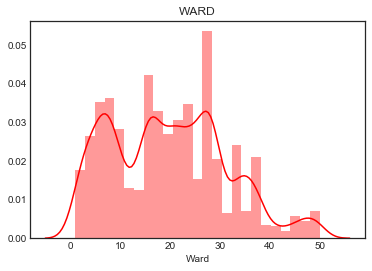

In [10]:
sns.distplot( data1sub["Ward"] , color="red", bins=25)
plt.title('WARD')
plt.show()


C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


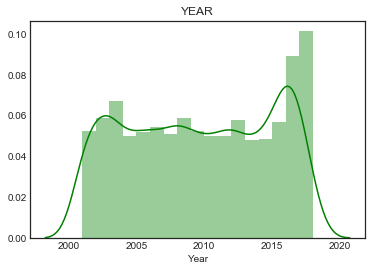

In [11]:
sns.distplot( data1sub["Year"] , color="green", bins=17)
plt.title('YEAR')
plt.show()

In [12]:
#todummy_list = ['Item_Fat_Content']

# Function to dummy all the categorical variables used for modeling
#def dummy_df(data1sub, todummy_list):
#    for x in todummy_list:
#        dummies = pd.get_dummies(data1sub[x], prefix=x, dummy_na=False)
#        data1sub = data1sub.drop(x, 1)
#        data1sub = pd.concat([data1sub, dummies], axis=1)
#    return data1sub

In [13]:
#dummy_df(data1sub, todummy_list)



                    Beat  District     Date1      Ward  Community Area  \
Beat            1.000000  0.969376 -0.006424  0.669022       -0.467561   
District        0.969376  1.000000 -0.008183  0.697156       -0.459991   
Date1          -0.006424 -0.008183  1.000000 -0.014013        0.021523   
Ward            0.669022  0.697156 -0.014013  1.000000       -0.474015   
Community Area -0.467561 -0.459991  0.021523 -0.474015        1.000000   
Year           -0.043254 -0.025013 -0.061845  0.002715        0.057303   
Time1          -0.030080 -0.029867 -0.005086 -0.023680        0.048884   

                    Year     Time1  
Beat           -0.043254 -0.030080  
District       -0.025013 -0.029867  
Date1          -0.061845 -0.005086  
Ward            0.002715 -0.023680  
Community Area  0.057303  0.048884  
Year            1.000000  0.056476  
Time1           0.056476  1.000000  


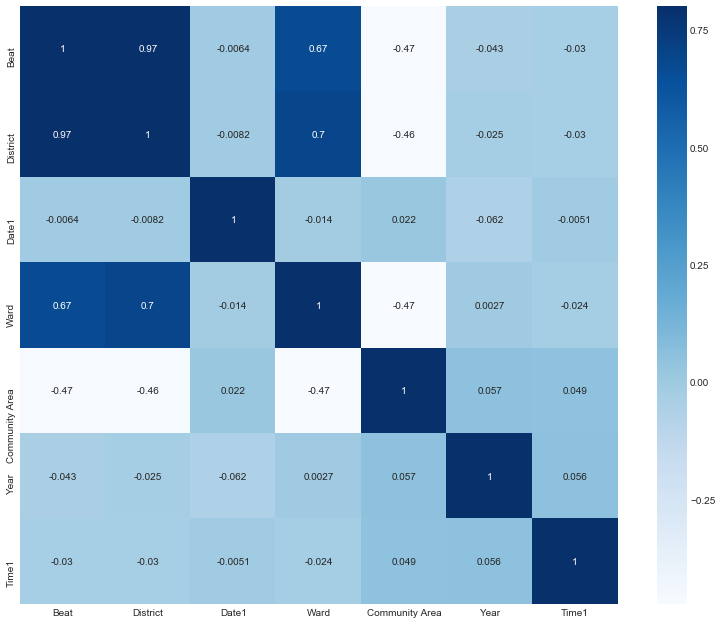

In [14]:
# Make the correlation matrix.
corrmat = data1sub.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [15]:
# Use PCA from sklearn.decompostion to find principal components
#from sklearn.decomposition import PCA

#pca = PCA(n_components=10)
#data1sub_pca = pd.DataFrame(pca.fit_transform(data1sub))

In [16]:
# Beat, District, and Ward are probably redundant, overlapping geographical areas
# 
means = data1sub[['Beat','District','Ward']].mean(axis=0)
stds = data1sub[['Beat','District','Ward']].std(axis=0)
data1sub['Beat_District_Ward'] = ((data1sub[['Beat','District','Ward']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Beat', 'District', 'Ward']]
plotdf['Beat_District_Ward'] = data1sub['Beat_District_Ward'] 
corrmat2 = plotdf.corr()

print(corrmat2)


                        Beat  District      Ward  Beat_District_Ward
Beat                1.000000  0.969376  0.669022            0.952602
District            0.969376  1.000000  0.697156            0.962759
Ward                0.669022  0.697156  1.000000            0.854316
Beat_District_Ward  0.952602  0.962759  0.854316            1.000000


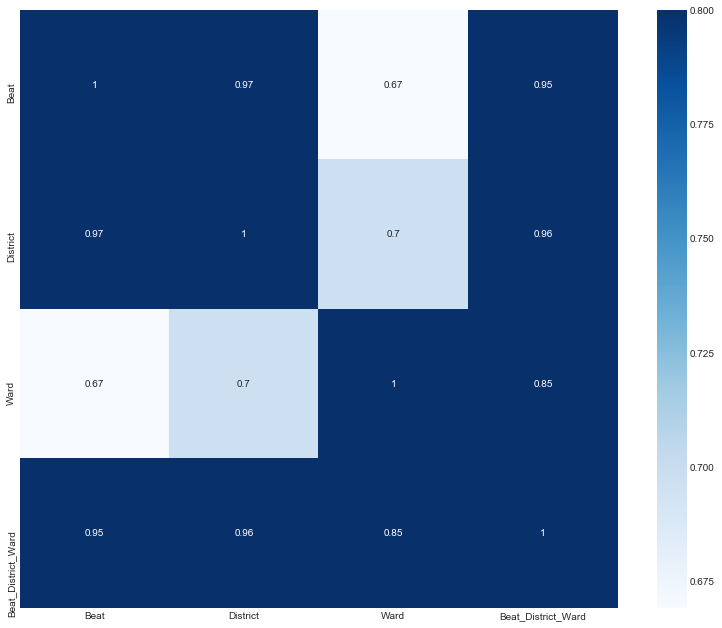

In [17]:
# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat2, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [18]:
# Time1 and Community Area show some correlation
# 
means = data1sub[['Time1','Community Area']].mean(axis=0)
stds = data1sub[['Time1','Community Area']].std(axis=0)
data1sub['Time_Community'] = ((data1sub[['Time1','Community Area']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Time1','Community Area']]
plotdf['Time_Community'] = data1sub['Time_Community'] 
corrmat3 = plotdf.corr()

print(corrmat3)

                   Time1  Community Area  Time_Community
Time1           1.000000        0.048884        0.724184
Community Area  0.048884        1.000000        0.724184
Time_Community  0.724184        0.724184        1.000000


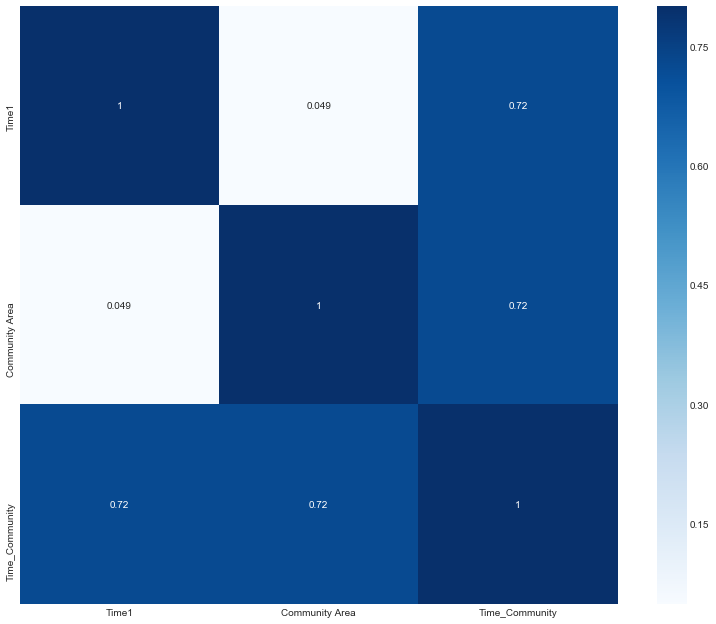

In [19]:
# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat3, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [20]:
# Time1 and Ward
# 
means = data1sub[['Time1','Ward']].mean(axis=0)
stds = data1sub[['Time1','Ward']].std(axis=0)
data1sub['Time_Ward'] = ((data1sub[['Time1','Ward']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Time1','Ward']]
plotdf['Time_Ward'] = data1sub['Time_Ward'] 
corrmat4 = plotdf.corr()

print(corrmat4)

              Time1      Ward  Time_Ward
Time1      1.000000 -0.023680   0.698684
Ward      -0.023680  1.000000   0.698684
Time_Ward  0.698684  0.698684   1.000000


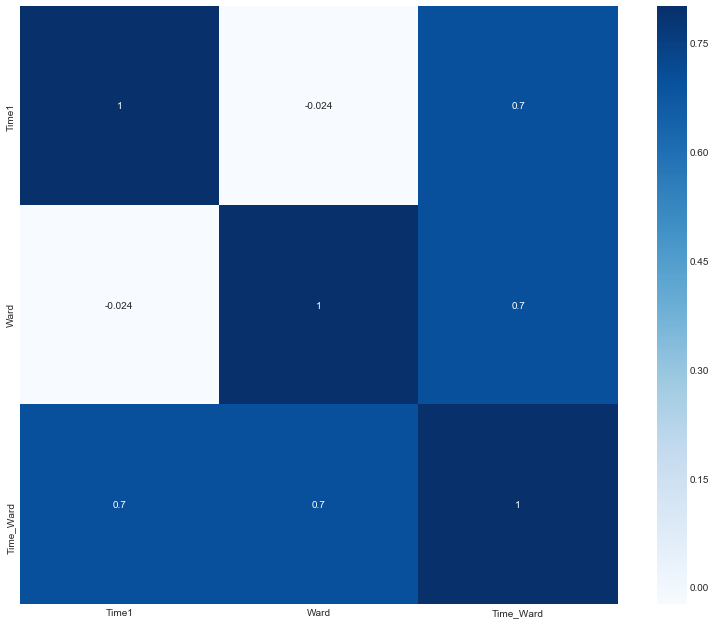

In [21]:
# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat4, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

                    Year  Community Area  Year_Community
Year            1.000000        0.057303        0.727084
Community Area  0.057303        1.000000        0.727084
Year_Community  0.727084        0.727084        1.000000


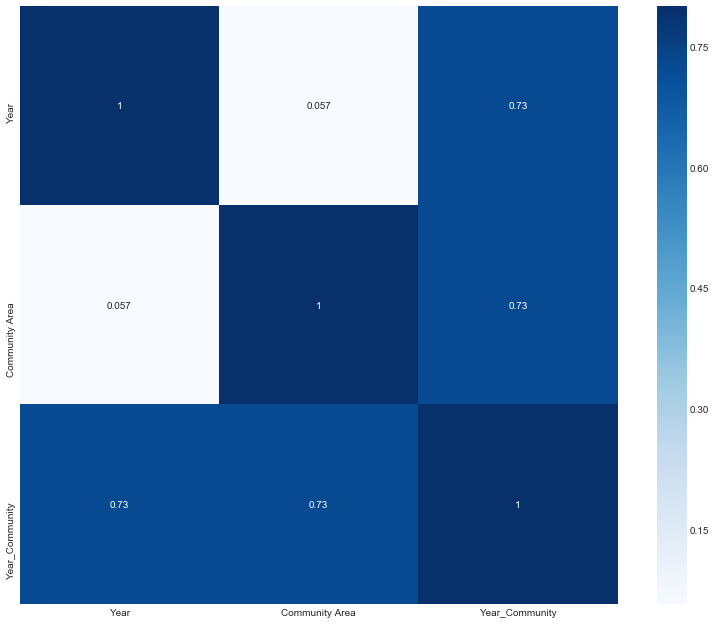

In [22]:
# Year and Community Area
# 
means = data1sub[['Year','Community Area']].mean(axis=0)
stds = data1sub[['Year','Community Area']].std(axis=0)
data1sub['Year_Community'] = ((data1sub[['Year','Community Area']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Year','Community Area']]
plotdf['Year_Community'] = data1sub['Year_Community'] 
corrmat5 = plotdf.corr()

print(corrmat5)

# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat5, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

                Year     Time1  Year_Time1
Year        1.000000  0.056476      0.7268
Time1       0.056476  1.000000      0.7268
Year_Time1  0.726800  0.726800      1.0000


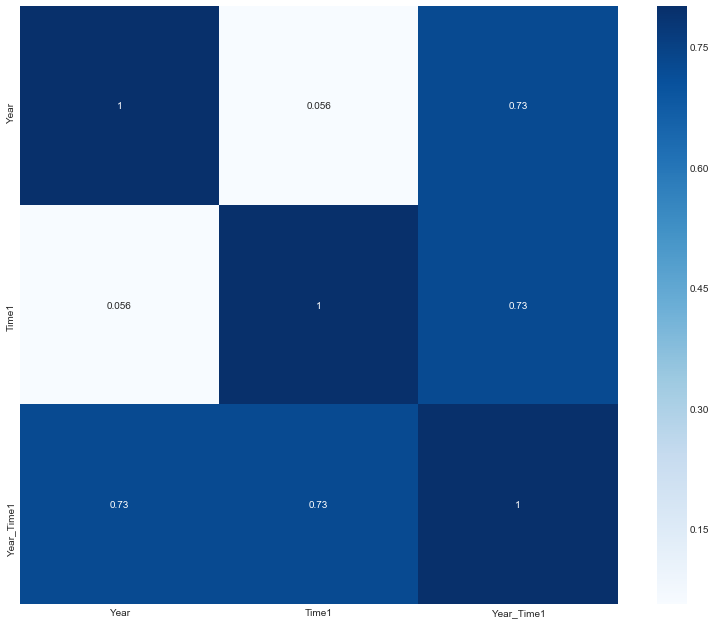

In [23]:
# Year and Time1
# 
means = data1sub[['Year','Time1']].mean(axis=0)
stds = data1sub[['Year','Time1']].std(axis=0)
data1sub['Year_Time1'] = ((data1sub[['Year','Time1']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Year','Time1']]
plotdf['Year_Time1'] = data1sub['Year_Time1'] 
corrmat7 = plotdf.corr()

print(corrmat7)

# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat7, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

                             Date1  Beat_District_Ward  \
Date1                     1.000000           -0.010333   
Beat_District_Ward       -0.010333            1.000000   
Date1_Beat_District_Ward  0.703444            0.703444   

                          Date1_Beat_District_Ward  
Date1                                     0.703444  
Beat_District_Ward                        0.703444  
Date1_Beat_District_Ward                  1.000000  


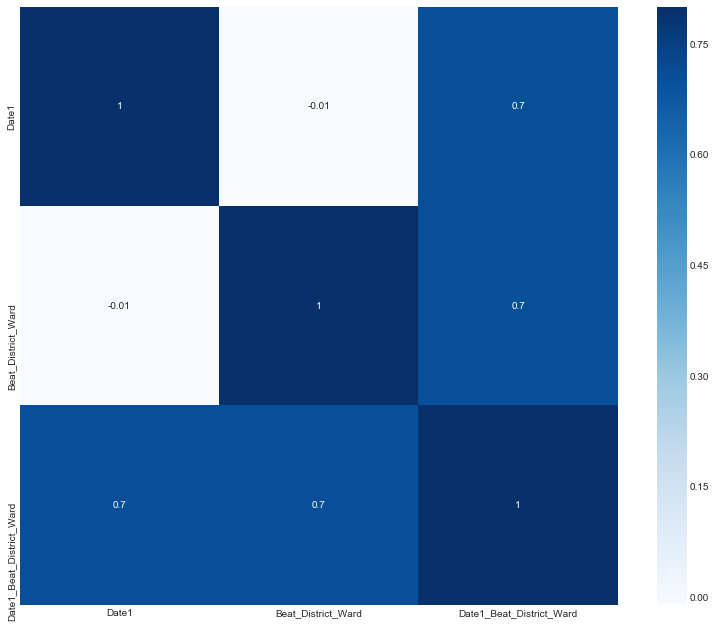

In [24]:
# Date1 and Beat_District_Ward
# 
means = data1sub[['Date1','Beat_District_Ward']].mean(axis=0)
stds = data1sub[['Date1','Beat_District_Ward']].std(axis=0)
data1sub['Date1_Beat_District_Ward'] = ((data1sub[['Date1','Beat_District_Ward']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Date1','Beat_District_Ward']]
plotdf['Date1_Beat_District_Ward'] = data1sub['Date1_Beat_District_Ward'] 
corrmat6 = plotdf.corr()

print(corrmat6)

# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat6, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

                               Year_Time1  Beat_District_Ward  \
Year_Time1                       1.000000           -0.037054   
Beat_District_Ward              -0.037054            1.000000   
Year_Time1_Beat_District_Ward    0.693883            0.693883   

                               Year_Time1_Beat_District_Ward  
Year_Time1                                          0.693883  
Beat_District_Ward                                  0.693883  
Year_Time1_Beat_District_Ward                       1.000000  


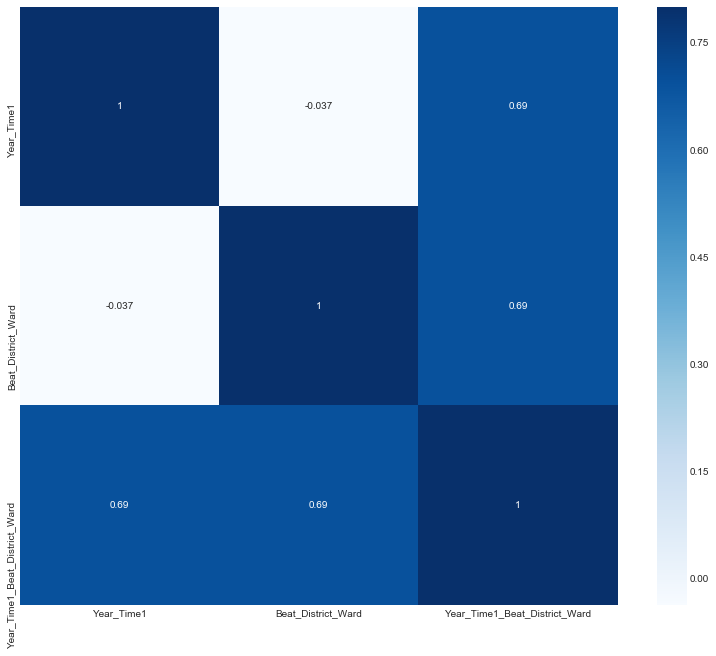

In [25]:
# Date1 and Beat_District_Ward
# 
means = data1sub[['Year_Time1','Beat_District_Ward']].mean(axis=0)
stds = data1sub[['Year_Time1','Beat_District_Ward']].std(axis=0)
data1sub['Year_Time1_Beat_District_Ward'] = ((data1sub[['Year_Time1','Beat_District_Ward']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Year_Time1','Beat_District_Ward']]
plotdf['Year_Time1_Beat_District_Ward'] = data1sub['Year_Time1_Beat_District_Ward'] 
corrmat7 = plotdf.corr()

print(corrmat7)

# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat7, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

                Date1     Time1  Date1_Time1
Date1        1.000000 -0.005086     0.705306
Time1       -0.005086  1.000000     0.705306
Date1_Time1  0.705306  0.705306     1.000000


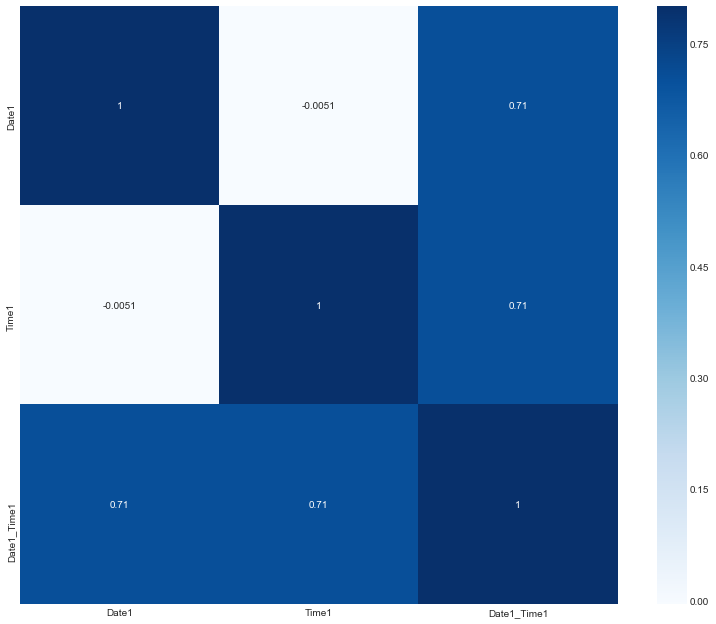

In [26]:
# Date1 and Beat_District_Ward
# 
means = data1sub[['Date1','Time1']].mean(axis=0)
stds = data1sub[['Date1','Time1']].std(axis=0)
data1sub['Date1_Time1'] = ((data1sub[['Date1','Time1']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = data1sub.loc[:, ['Date1','Time1']]
plotdf['Date1_Time1'] = data1sub['Date1_Time1'] 
corrmat8 = plotdf.corr()

print(corrmat8)

# Draw the heatmap using seaborn.



# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

sns.heatmap(corrmat8, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

In [27]:
#I want to see what happens if I scale these variables, since they all vary in range

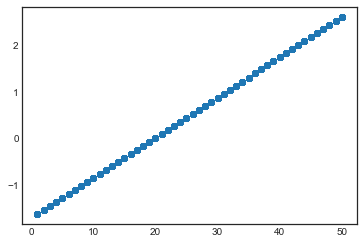

               Beat      District         Date1          Ward  Community Area  \
count  8.739000e+03  8.739000e+03  8.739000e+03  8.739000e+03    8.739000e+03   
mean  -1.599666e-15  7.394566e-14 -3.524790e-17 -9.344207e-15    1.601216e-15   
std    1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00    1.000057e+00   
min   -1.478129e+00 -1.450906e+00 -1.793272e+00 -1.625555e+00   -2.121845e+00   
25%   -6.892131e-01 -8.126807e-01 -8.559311e-01 -9.345397e-01   -8.974129e-01   
50%   -1.985072e-01 -1.744549e-01  8.140998e-02  1.560696e-02    2.091161e-02   
75%    5.746308e-01  3.042144e-01  7.063040e-01  7.066227e-01    9.902541e-01   
max    2.346537e+00  2.378448e+00  1.643645e+00  2.606916e+00    1.755524e+00   

               Year         Time1  Beat_District_Ward  Time_Community  \
count  8.739000e+03  8.739000e+03        8.739000e+03    8.739000e+03   
mean   1.876465e-14 -1.785288e-15        4.162923e-15   -1.709555e-15   
std    1.000057e+00  1.000057e+00        1.000057e+

In [28]:
from sklearn import preprocessing

# Select only numeric variables to scale.
data1_scale = data1sub.select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=data1_scale.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(data1_scale), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(data1_scale['Ward'], df_scaled['Ward'])
plt.show()


# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

In [29]:
#I don't see that scaling did anything, I probably don't understand what I'm doing with this.

C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

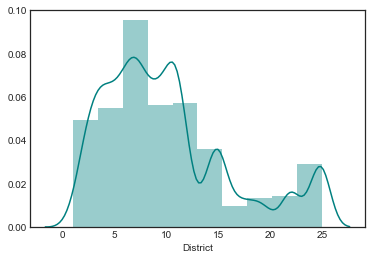

In [30]:
sns.distplot( data1sub["District"] , color="teal", bins=10)
plt.show

C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

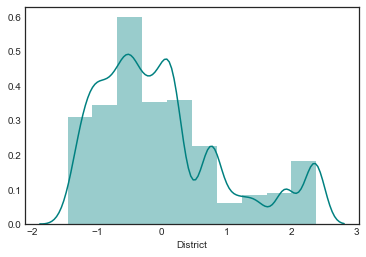

In [31]:
sns.distplot( df_scaled["District"] , color="teal", bins=10)
plt.show

In [32]:
#Yep, no difference after the scaling.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


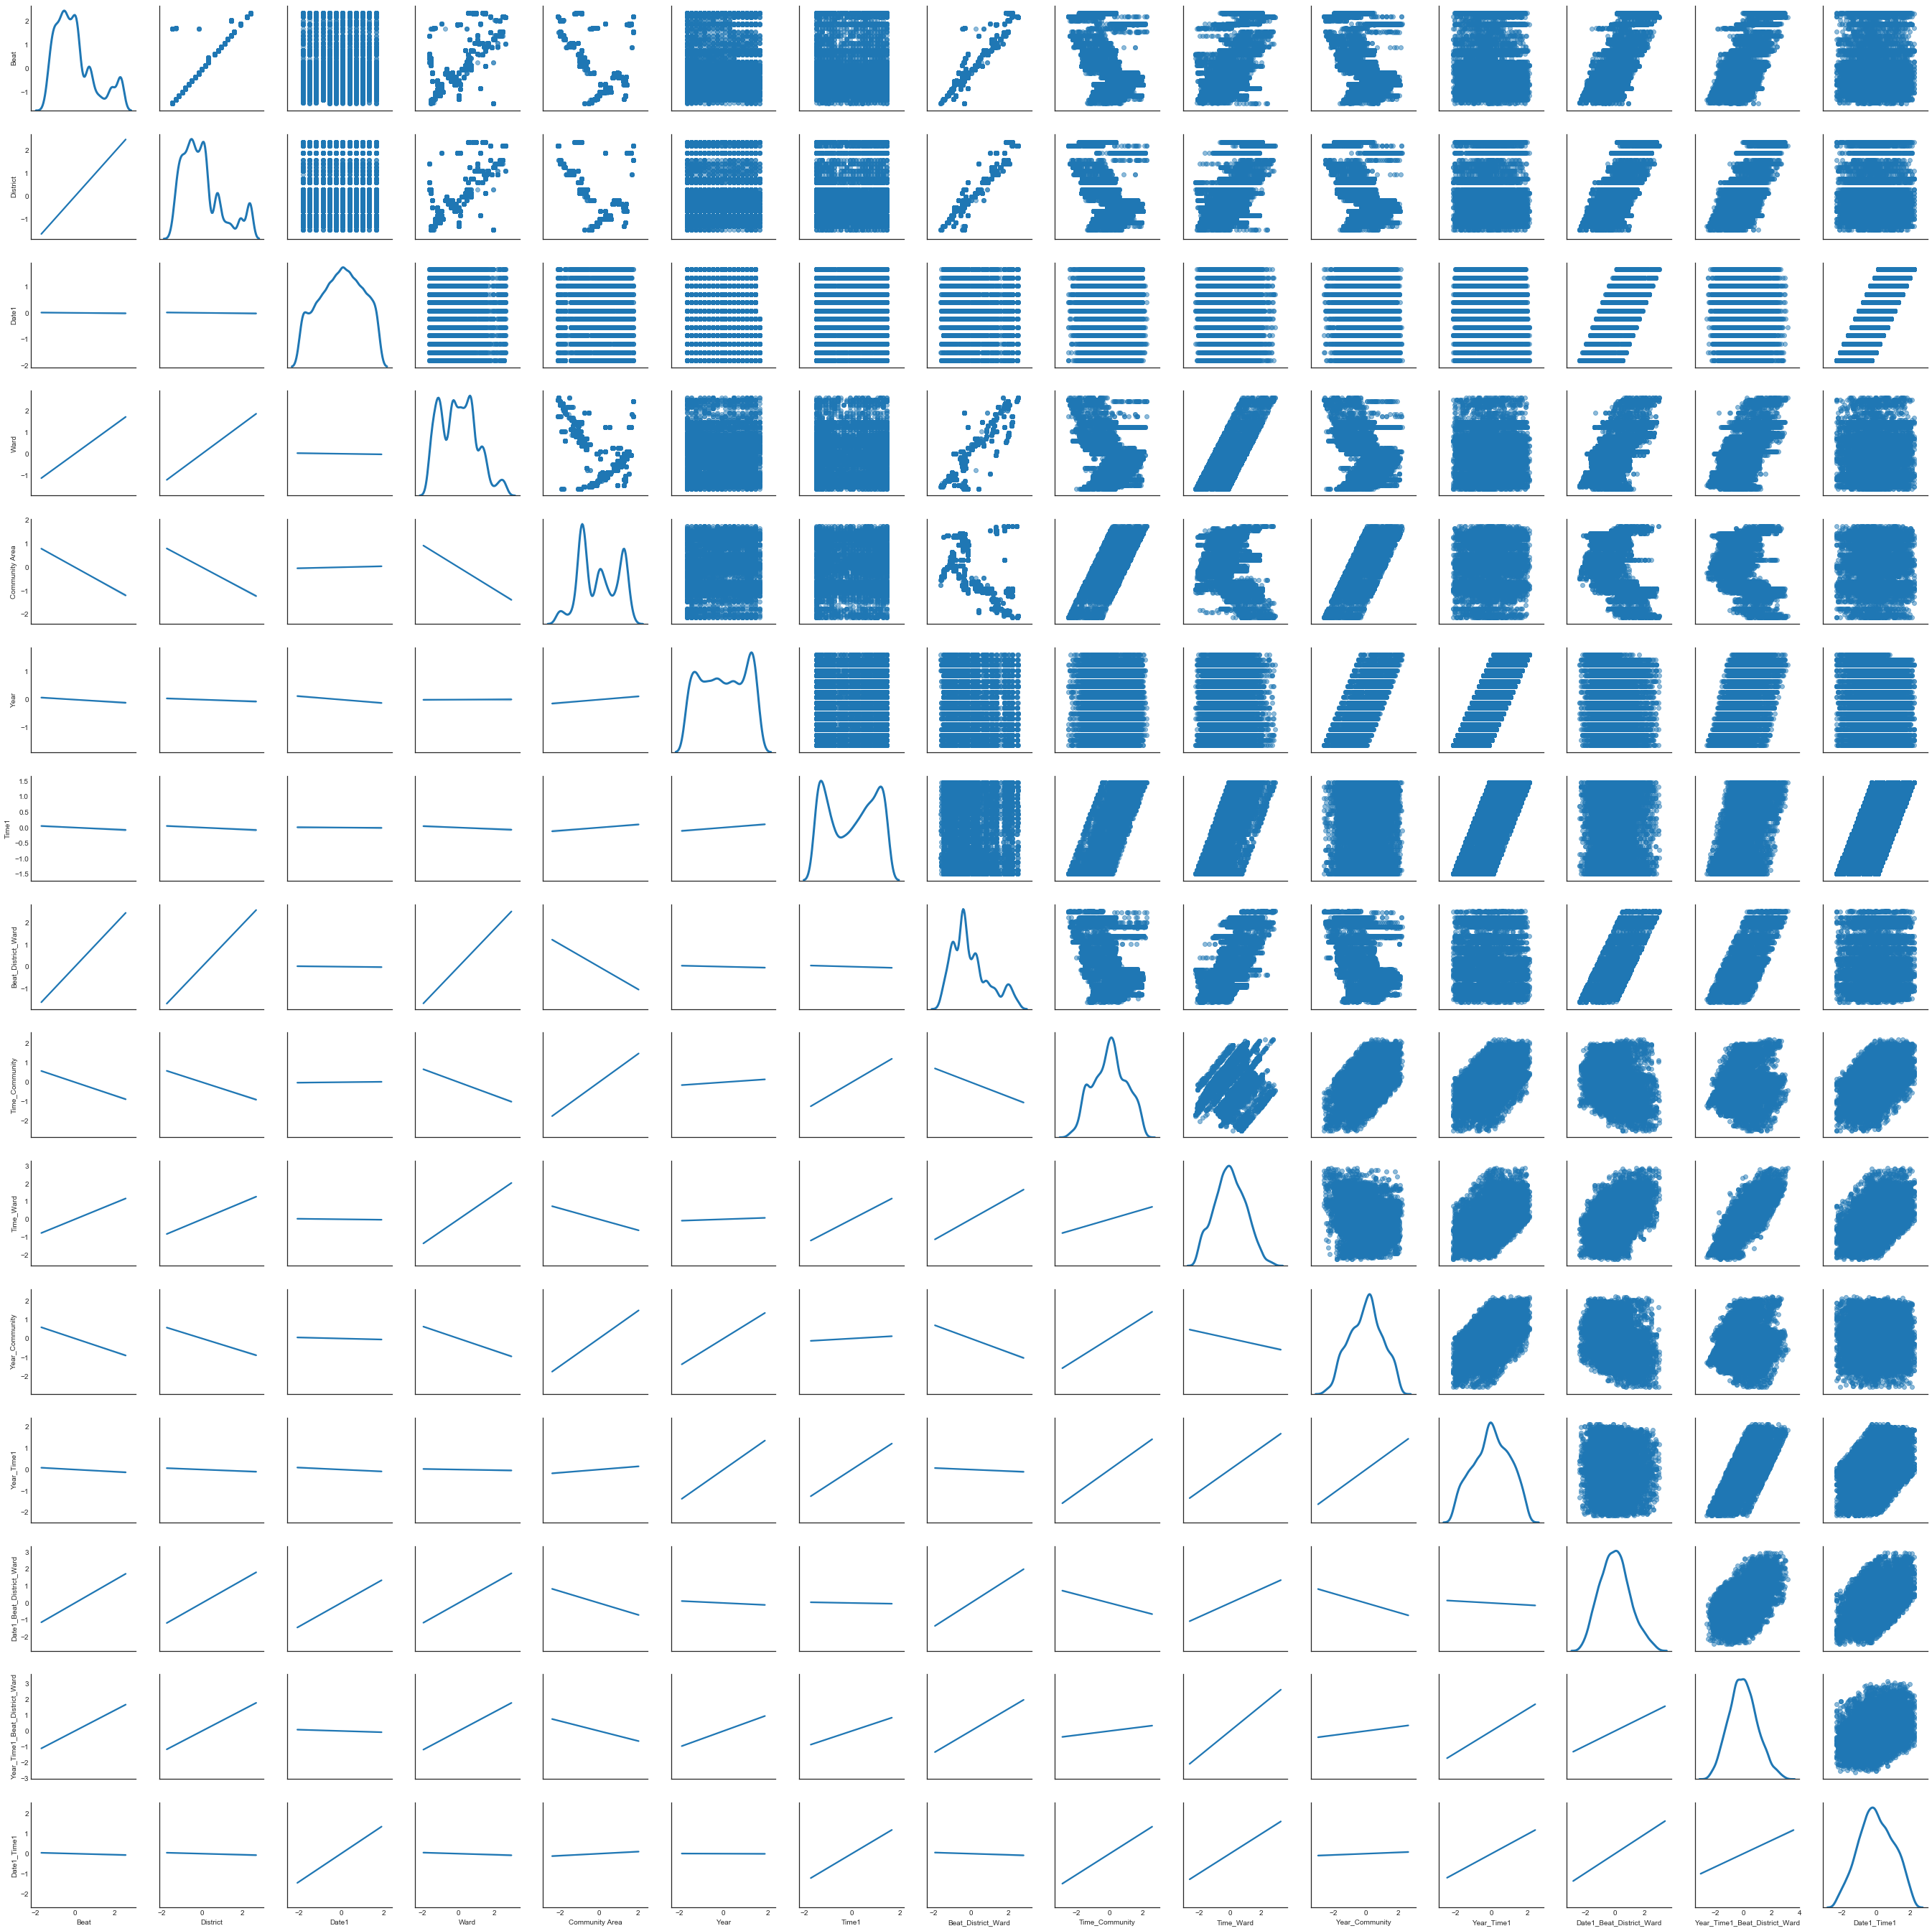

In [33]:
t = sns.PairGrid(df_scaled.dropna(), diag_sharey=False)

# Scatterplot.
t.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
t.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
t.map_diag(sns.kdeplot, lw=3)
plt.show()

                                   Beat  District     Date1      Ward  \
Beat                           1.000000  0.969376 -0.006424  0.669022   
District                       0.969376  1.000000 -0.008183  0.697156   
Date1                         -0.006424 -0.008183  1.000000 -0.014013   
Ward                           0.669022  0.697156 -0.014013  1.000000   
Community Area                -0.467561 -0.459991  0.021523 -0.474015   
Year                          -0.043254 -0.025013 -0.061845  0.002715   
Time1                         -0.030080 -0.029867 -0.005086 -0.023680   
Beat_District_Ward             0.952602  0.962759 -0.010333  0.854316   
Time_Community                -0.343588 -0.338213  0.011349 -0.343625   
Time_Ward                      0.457246  0.477533 -0.013667  0.698684   
Year_Community                -0.351277 -0.333527 -0.027729 -0.324103   
Year_Time1                    -0.050450 -0.037755 -0.046045 -0.014423   
Date1_Beat_District_Ward       0.672532  0.678502  

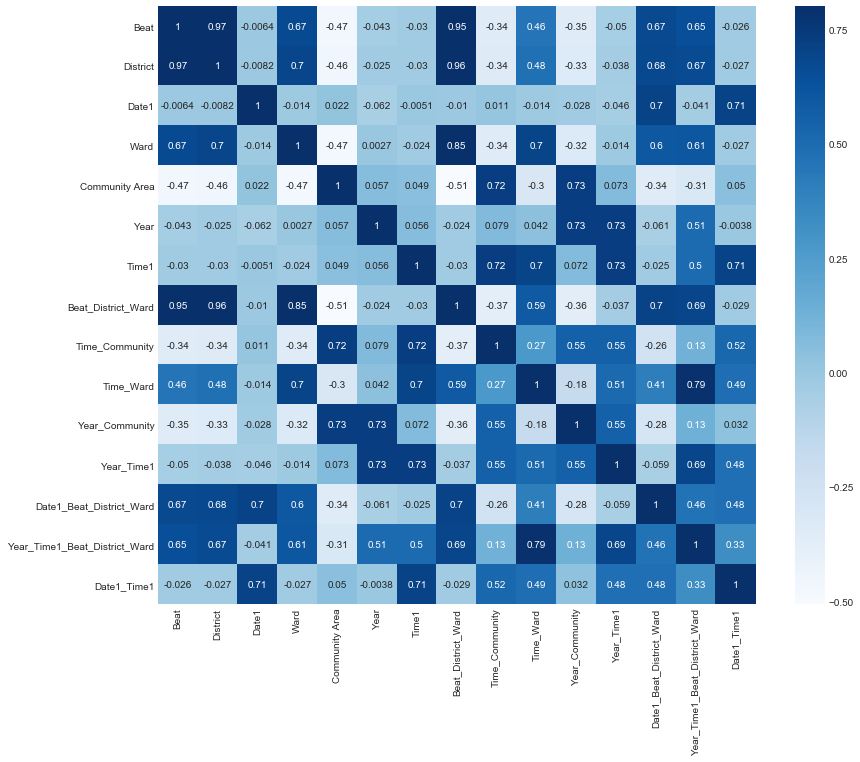

In [34]:
# Make the correlation matrix.
corrmat = df_scaled.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(14, 11))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, cmap="Blues", annot=True)
plt.show()

Covariance Matrix:
 [[ 1.00011444  0.02152576 -0.46761489  0.0573097 ]
 [ 0.02152576  1.00011444 -0.00642468 -0.0618525 ]
 [-0.46761489 -0.00642468  1.00011444 -0.04325895]
 [ 0.0573097  -0.0618525  -0.04325895  1.00011444]]
Eigenvector 1: 
[[-0.70078619]
 [-0.02226411]
 [ 0.69828902]
 [-0.14420634]]
Eigenvalue 1: 1.478539992089227
----------------------------------------
Eigenvector 2: 
[[-0.70837711]
 [ 0.02620701]
 [-0.70490271]
 [ 0.02504465]]
Eigenvalue 2: 0.5319705365313204
----------------------------------------
Eigenvector 3: 
[[ 0.0592452 ]
 [ 0.73496304]
 [-0.05613011]
 [-0.6731781 ]]
Eigenvalue 3: 1.0589931390839245
----------------------------------------
Eigenvector 4: 
[[ 0.05992157]
 [-0.6772347 ]
 [-0.11114866]
 [-0.7248507 ]]
Eigenvalue 4: 0.9309541029524298
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.3695927  0.13297742 0.26471799 0.23271189]


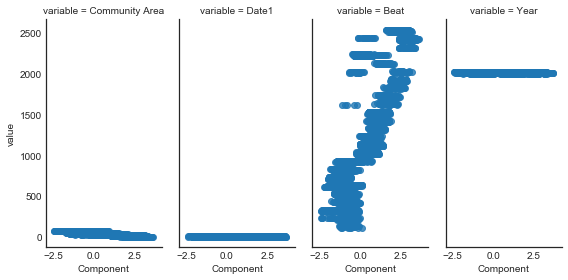

In [35]:
df_pca = data1sub[['Community Area', 'Date1', 'Beat', 'Year']].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 4).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['Community Area', 'Date1', 'Beat', 'Year']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

In [36]:
data1sub.head(20)

,Beat,District,Date1,Ward,Community Area,Year,Time1,Beat_District_Ward,Time_Community,Time_Ward,Year_Community,Year_Time1,Date1_Beat_District_Ward,Year_Time1_Beat_District_Ward,Date1_Time1
52,1823,18,2,27.0,8.0,2006,11,1.034914,-0.925111,0.267303,-1.221728,-0.382221,-0.179882,0.297540,-0.783172
53,533,5,12,9.0,54.0,2016,12,-0.853119,0.312165,-0.446116,0.908668,0.638756,0.359744,-0.022601,0.842902
54,533,5,8,9.0,54.0,2005,11,-0.853119,0.248236,-0.510045,-0.144085,-0.477926,-0.265115,-0.790820,0.154115
55,533,5,12,9.0,54.0,2003,1,-0.853119,-0.391052,-1.149333,-0.335495,-1.308623,0.359744,-1.362296,0.139685
57,533,5,5,9.0,54.0,2011,23,-0.853119,1.015382,0.257101,0.430144,0.863449,-0.733758,0.131976,0.452617
58,533,5,9,9.0,54.0,2013,0,-0.853119,-0.454981,-1.213262,0.621553,-0.415504,-0.108900,-0.747877,-0.392887
59,533,5,11,9.0,54.0,2003,13,-0.853119,0.376094,-0.382188,-0.335495,-0.541478,0.203529,-0.834540,0.750616
60,533,5,12,9.0,54.0,2006,16,-0.853119,0.567880,-0.190401,-0.048380,-0.062577,0.359744,-0.505081,1.098617
61,533,5,5,9.0,54.0,2003,8,-0.853119,0.056450,-0.701832,-0.335495,-0.861122,-0.733758,-1.054438,-0.506315
62,433,4,2,10.0,55.0,2018,12,-0.930103,0.337673,-0.402930,1.125585,0.830166,-1.244095,0.067386,-0.719243
